In [23]:
import ROOT as R
import numpy as np
import pandas as pd

# Defining a function for easier histograms
def hist(arr, title='Title', bins=92):
    h = R.TH1F('h', title, bins, np.amin(arr), np.amax(arr)*(1+1/bins))
    for value in arr:
        h.Fill(value)
    c = R.TCanvas()
    return h, c
    

# location 
floc = '/home/sander/Bachelor research project/root files/'
fname = 'ntuples_mc_lb2lee_upgrade.root'
treename = 'TupleLb2Lee/DecayTree;1'

# data
R.ROOT.EnableImplicitMT()
rdf = R.RDataFrame(treename,floc+fname)

# use pandas
observables = ['Lb_BKGCAT',
'L0_TRUEP_E', 'L0_TRUEP_X', 'L0_TRUEP_Y', 'L0_TRUEP_Z', 
'Lb_TRUEP_E', 'Lb_TRUEP_X', 'Lb_TRUEP_Y', 'Lb_TRUEP_Z',
'em_TRUEP_E', 'em_TRUEP_X', 'em_TRUEP_Y', 'em_TRUEP_Z',
'ep_TRUEP_E','ep_TRUEP_X', 'ep_TRUEP_Y', 'ep_TRUEP_Z',
'L0_PE', 'L0_PX', 'L0_PY', 'L0_PZ',
'Lb_PE', 'Lb_PX', 'Lb_PY', 'Lb_PZ',
'em_PE', 'em_PX', 'em_PY', 'em_PZ',
'ep_PE', 'ep_PX', 'ep_PY', 'ep_PZ',
'Lb_M',
'em_PP_CaloHasBrem', 'ep_PP_CaloHasBrem'
]


df = pd.DataFrame(rdf.AsNumpy(observables))


# has 10, 30, 40, 50, 60, 63, 66, 70, 80, 100, 110, 120, 130 
bkgcat_mask = (df['Lb_BKGCAT']==10) | (df['Lb_BKGCAT']==50)
pz_mask = (df['em_TRUEP_Z']>100) & (df['ep_TRUEP_Z']>100)
brem_mask = (df['em_PP_CaloHasBrem']==1) & (df['ep_PP_CaloHasBrem']==1)

df_bremadded = df[brem_mask] 



total_mask = bkgcat_mask & brem_mask & pz_mask
df = df[total_mask]




# Reconstructing variables - TRUE

ee_TRUE_P = np.sqrt((df['em_TRUEP_X']+df['ep_TRUEP_X'])**2 + (df['em_TRUEP_Y']+df['ep_TRUEP_Y'])**2 + (df['em_TRUEP_Z']+df['ep_TRUEP_Z'])**2)
ee_TRUE_P2 = np.sqrt((df['Lb_TRUEP_X']-df['L0_TRUEP_X'])**2 + (df['Lb_TRUEP_Y']-df['L0_TRUEP_Y'])**2 + (df['Lb_TRUEP_Z']-df['L0_TRUEP_Z'])**2)
ee_TRUE_PE = df['em_TRUEP_E'] + df['ep_TRUEP_E']
ee_TRUE_PE2 = df['Lb_TRUEP_E'] - df['L0_TRUEP_E']
L0ee_TRUE_P = np.sqrt((df['em_TRUEP_X']+df['ep_TRUEP_X']+df['L0_TRUEP_X'])**2 + (df['em_TRUEP_Y']+df['ep_TRUEP_Y']+df['L0_TRUEP_Y'])**2 + (df['em_TRUEP_Z']+df['ep_TRUEP_Z']+df['L0_TRUEP_Z'])**2)
L0ee_TRUE_PE = ee_TRUE_PE + df['L0_TRUEP_E']

# Invariant mass of true data
ee_TRUE_M = np.sqrt(ee_TRUE_PE**2 - ee_TRUE_P**2)
ee_TRUE_M2 = np.sqrt(ee_TRUE_PE2**2 - ee_TRUE_P2**2)
L0ee_TRUE_M = np.sqrt(L0ee_TRUE_PE**2 - L0ee_TRUE_P**2)


# Reconstructing variables - REC
ee_REC_P = np.sqrt((df['em_PX']+df['ep_PX'])**2 + (df['em_PY']+df['ep_PY'])**2 + (df['em_PZ']+df['ep_PZ'])**2)
ee_REC_P2 = np.sqrt((df['Lb_PX']-df['L0_PX'])**2 + (df['Lb_PY']-df['L0_PY'])**2 + (df['Lb_PZ']-df['L0_PZ'])**2)
ee_REC_PE = df['em_PE'] + df['ep_PE']
ee_REC_PE2 = df['Lb_PE'] - df['L0_PE']
L0ee_REC_P = np.sqrt((df['em_PX']+df['ep_PX']+df['L0_PX'])**2 + (df['em_PY']+df['ep_PY']+df['L0_PY'])**2 + (df['em_PZ']+df['ep_PZ']+df['L0_PZ'])**2)
L0ee_REC_PE = ee_REC_PE + df['L0_PE']

# Invariant mass of rec data
ee_REC_M = np.sqrt(ee_REC_PE**2 - ee_REC_P**2)
ee_REC_M2 = np.sqrt(ee_REC_PE2**2 - ee_REC_P2**2)
L0ee_REC_M = np.sqrt(L0ee_REC_PE**2 - L0ee_REC_P**2)




/home/sander/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


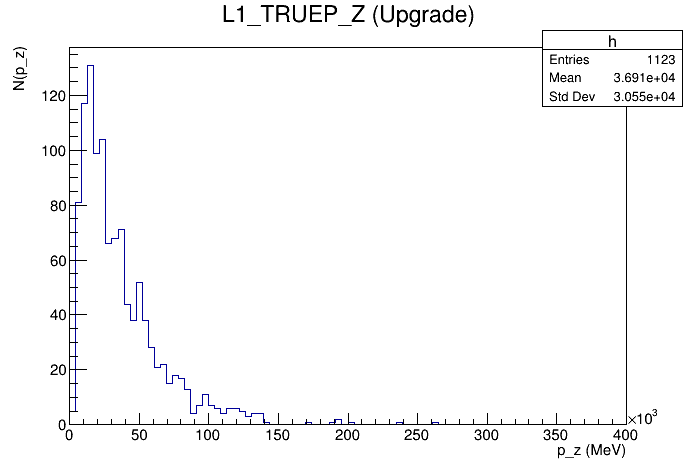

In [24]:
# em_TRUEP_Z

h1 = R.TH1F('h', 'L1_TRUEP_Z (Upgrade)', 92, 0, 400000)
for value in df['em_TRUEP_Z']:
    h1.Fill(value)
c1 = R.TCanvas()
h1.GetXaxis().SetTitle('p_z (MeV)')
h1.GetYaxis().SetTitle('N(p_z)')
h1.Draw()
c1.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


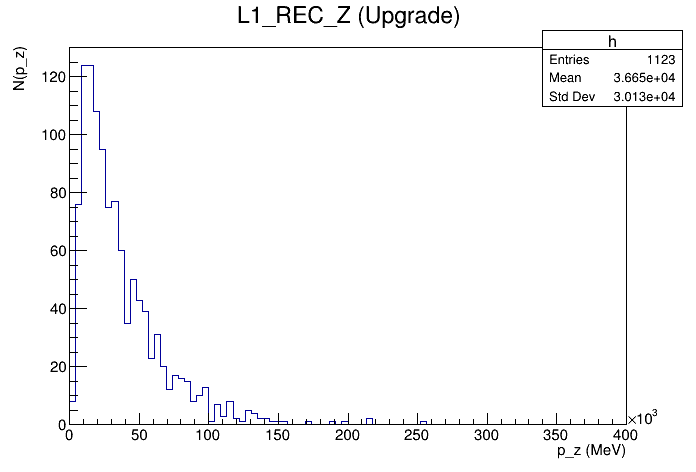

In [25]:
h1b = R.TH1F('h', 'L1_REC_Z (Upgrade)', 92, 0, 400000)
for value in df['em_PZ']:
    h1b.Fill(value)
c1b = R.TCanvas()
h1b.GetXaxis().SetTitle('p_z (MeV)')
h1b.GetYaxis().SetTitle('N(p_z)')
h1b.Draw()
c1b.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


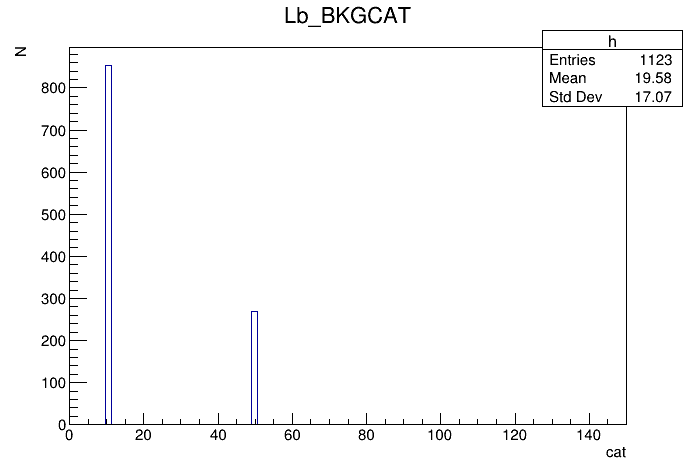

In [26]:
h1c = R.TH1F('h', 'Lb_BKGCAT', 92, 0, 150)
for value in df['Lb_BKGCAT']:
    h1c.Fill(value)
c1c = R.TCanvas()
h1c.GetXaxis().SetTitle('cat')
h1c.GetYaxis().SetTitle('N')
h1c.Draw()
c1c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


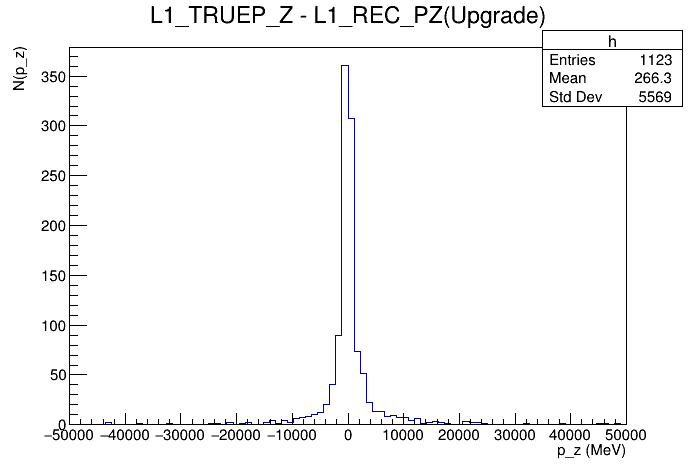

In [27]:
diff_PZ = df['em_TRUEP_Z'] - df['em_PZ']

h1d = R.TH1F('h', 'L1_TRUEP_Z - L1_REC_PZ(Upgrade)', 92, -50000, 50000)
for value in diff_PZ:
    h1d.Fill(value)
c1d = R.TCanvas()
h1d.GetXaxis().SetTitle('p_z (MeV)')
h1d.GetYaxis().SetTitle('N(p_z)')
h1d.Draw()
c1d.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


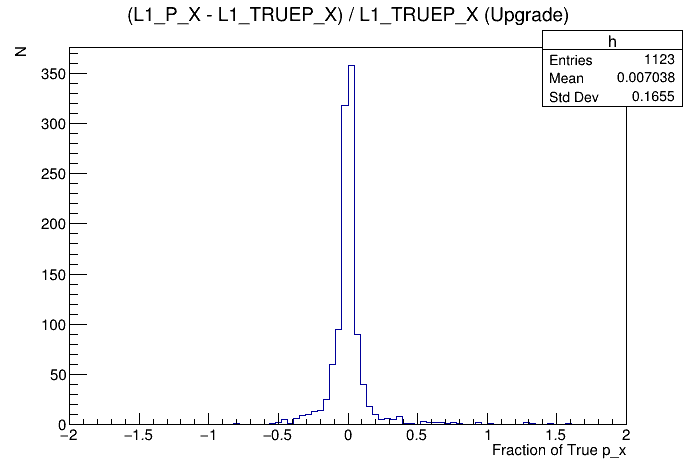

In [28]:
# em_P - em_P true  / em_P true (x direction)

L1_P_X_diff = (df['em_PX']-df['em_TRUEP_X']) / df['em_TRUEP_X']

h2 = R.TH1F('h', '(L1_P_X - L1_TRUEP_X) / L1_TRUEP_X (Upgrade)', 92, -2, 2)
for value in L1_P_X_diff:
    h2.Fill(value)
c2 = R.TCanvas()
h2.GetXaxis().SetTitle('Fraction of True p_x')
h2.GetYaxis().SetTitle('N')
h2.Draw()
c2.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


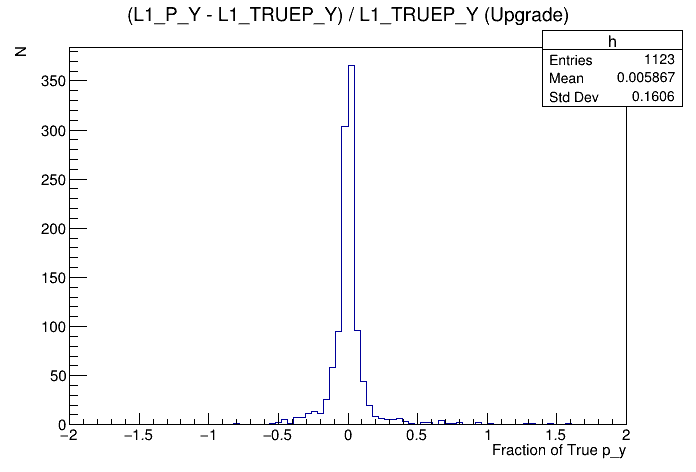

In [29]:
# em_P - em_P true / em_P true (y direction)

L1_P_Y_diff = (df['em_PY']-df['em_TRUEP_Y']) / df['em_TRUEP_Y']

h3 = R.TH1F('h', '(L1_P_Y - L1_TRUEP_Y) / L1_TRUEP_Y (Upgrade)', 92, -2, 2)
for value in L1_P_Y_diff:
    h3.Fill(value)
c3 = R.TCanvas()
h3.GetXaxis().SetTitle('Fraction of True p_y')
h3.GetYaxis().SetTitle('N')
h3.Draw()
c3.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


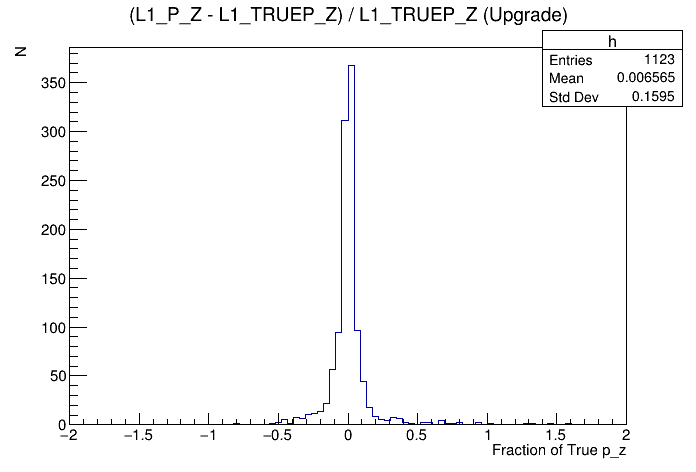

In [30]:
# em_P - em_P true (z direction)

L1_P_Z_diff = (df['em_PZ']-df['em_TRUEP_Z']) / df['em_TRUEP_Z']

h4 = R.TH1F('h', '(L1_P_Z - L1_TRUEP_Z) / L1_TRUEP_Z (Upgrade)', 92, -2, 2)
for value in L1_P_Z_diff:
    h4.Fill(value)
c4 = R.TCanvas()
h4.GetXaxis().SetTitle('Fraction of True p_z')
h4.GetYaxis().SetTitle('N')
h4.Draw()
c4.Draw()



Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


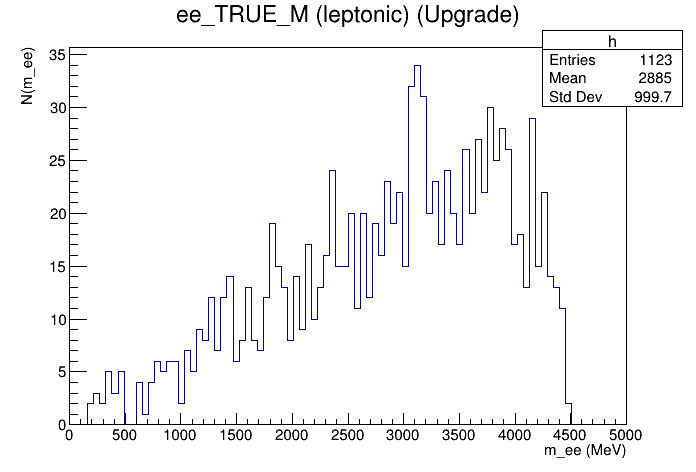

In [31]:
# ee_TRUEM with ee_Fourvector (ee_TRUEP_E and ee_TRUEP)

h5 = R.TH1F('h', 'ee_TRUE_M (leptonic) (Upgrade)', 92, 0, 5000)
for value in ee_TRUE_M:
    h5.Fill(value)
c5 = R.TCanvas()
h5.GetXaxis().SetTitle('m_ee (MeV)')
h5.GetYaxis().SetTitle('N(m_ee)')
h5.Draw()
c5.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


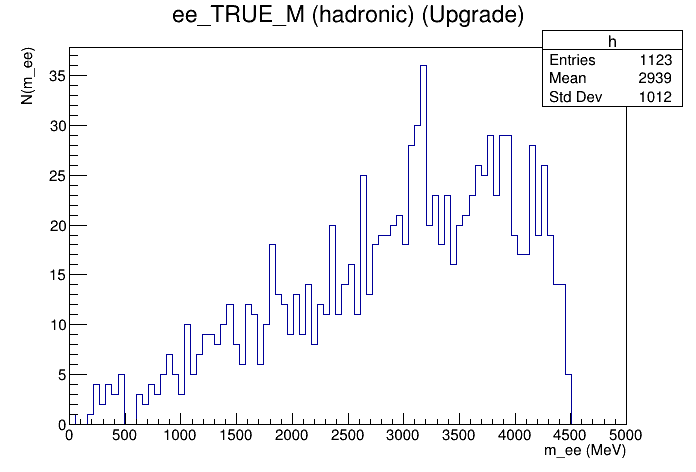

In [32]:
# ee_TRUE_M2 is ee_FourV with Lb and L0 TRUE values

h6 = R.TH1F('h', 'ee_TRUE_M (hadronic) (Upgrade)', 92, 0, 5000)
for value in ee_TRUE_M2:
    h6.Fill(value)
c6 = R.TCanvas()
h6.GetXaxis().SetTitle('m_ee (MeV)')
h6.GetYaxis().SetTitle('N(m_ee)')
h6.Draw()
c6.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


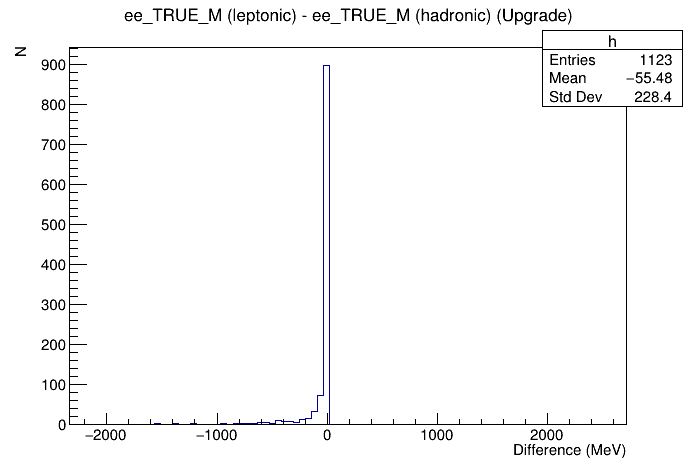

In [33]:
# diff in ee_TRUE_M and ee_TRUE_M2. Difference is bc of final state radiation

diff_TRUE = ee_TRUE_M - ee_TRUE_M2

h7 = R.TH1F('h', 'ee_TRUE_M (leptonic) - ee_TRUE_M (hadronic) (Upgrade)', 92, np.amin(diff_TRUE), np.amax(diff_TRUE)*(1+1/92))
for value in diff_TRUE:
    h7.Fill(value)
c7 = R.TCanvas()
h7.GetXaxis().SetTitle('Difference (MeV)')
h7.GetYaxis().SetTitle('N')
h7.Draw()
c7.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


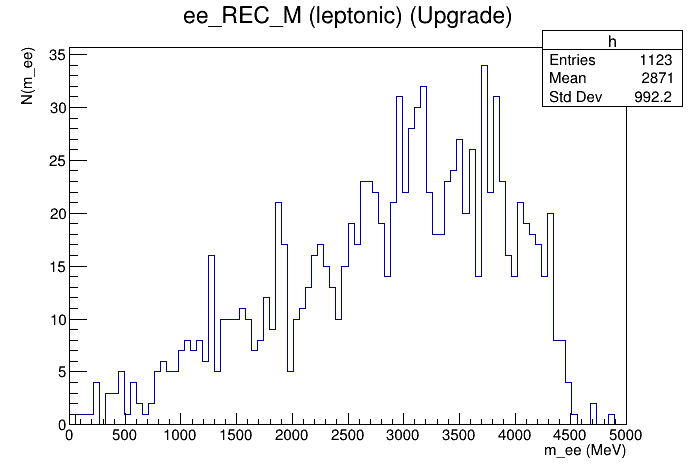

In [34]:
# ee_REC_M with ee_TRUEP_E and ee_TRUEP

h8 = R.TH1F('h', 'ee_REC_M (leptonic) (Upgrade)', 92, 0, 5000)
for value in ee_REC_M:
    h8.Fill(value)
c8 = R.TCanvas()
h8.GetXaxis().SetTitle('m_ee (MeV)')
h8.GetYaxis().SetTitle('N(m_ee)')
h8.Draw()
c8.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


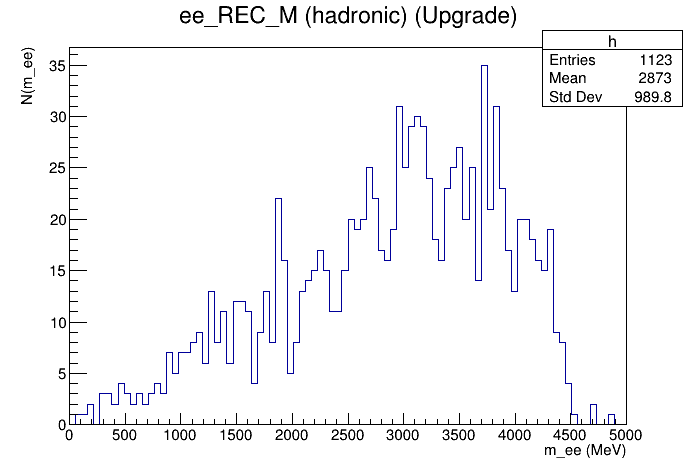

In [35]:
# ee_REC_M2 is ee_FourV with Lb and L0 TRUE values

h9 = R.TH1F('h', 'ee_REC_M (hadronic) (Upgrade)', 92, 0, 5000)
for value in ee_REC_M2:
    h9.Fill(value)
c9 = R.TCanvas()
h9.GetXaxis().SetTitle('m_ee (MeV)')
h9.GetYaxis().SetTitle('N(m_ee)')
h9.Draw()
c9.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


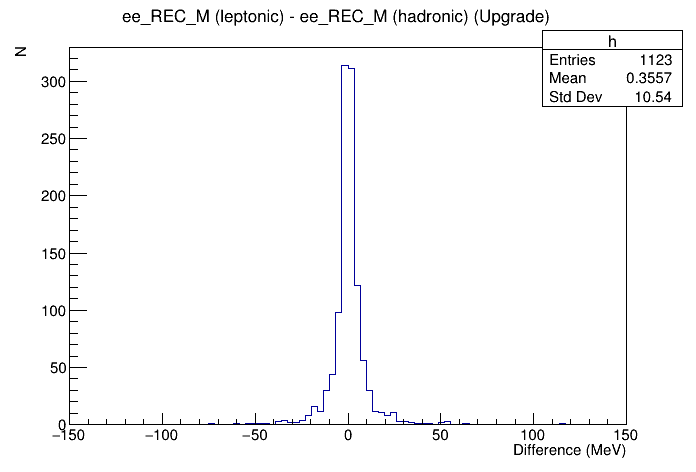

In [36]:
# diff in ee_REC_M and ee_REC_M2

diff_REC = ee_REC_M - ee_REC_M2

h10 = R.TH1F('h', 'ee_REC_M (leptonic) - ee_REC_M (hadronic) (Upgrade)', 92, -150, 150)
for value in diff_REC:
    h10.Fill(value)
c10 = R.TCanvas()
h10.GetXaxis().SetTitle('Difference (MeV)')
h10.GetYaxis().SetTitle('N')
h10.Draw()
c10.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


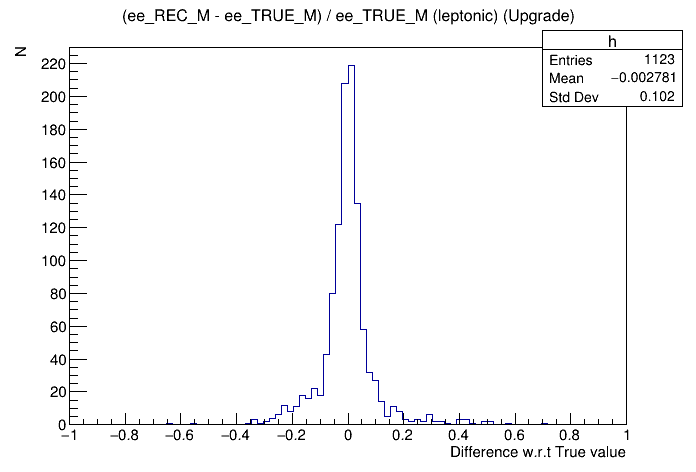

In [37]:
res = (ee_REC_M - ee_TRUE_M) / ee_TRUE_M



h11 = R.TH1F('h', '(ee_REC_M - ee_TRUE_M) / ee_TRUE_M (leptonic) (Upgrade)', 92, -1, 1)
for value in res:
    h11.Fill(value)
c11 = R.TCanvas()
h11.GetXaxis().SetTitle('Difference w.r.t True value')
h11.GetYaxis().SetTitle('N')
h11.Draw()
c11.Draw()


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


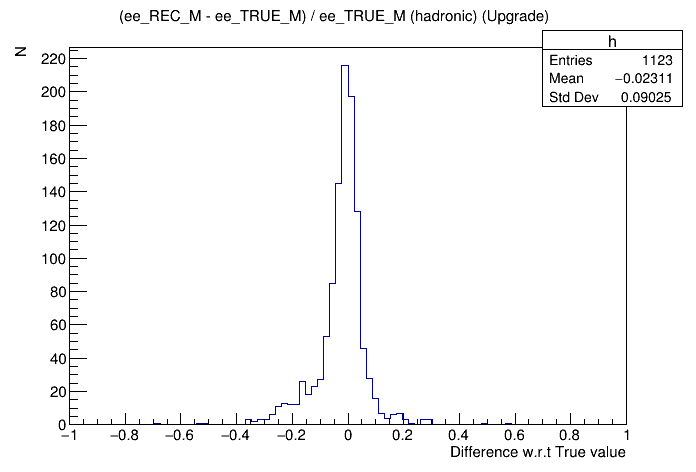

In [38]:
res2 = (ee_REC_M2 - ee_TRUE_M2) / ee_TRUE_M2



h12 = R.TH1F('h', '(ee_REC_M - ee_TRUE_M) / ee_TRUE_M (hadronic) (Upgrade)', 92, -1, 1)
for value in res2:
    h12.Fill(value)
c12 = R.TCanvas()
h12.GetXaxis().SetTitle('Difference w.r.t True value')
h12.GetYaxis().SetTitle('N')
h12.Draw()
c12.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


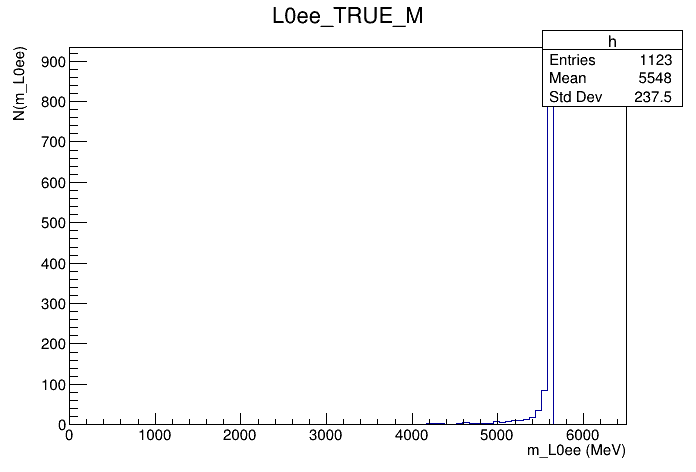

In [39]:
# L0ee_TRUE_M

h23 = R.TH1F('h', 'L0ee_TRUE_M', 92, 0, 6500)
for value in L0ee_TRUE_M:
    h23.Fill(value)
h23.GetXaxis().SetTitle('m_L0ee (MeV)')
h23.GetYaxis().SetTitle('N(m_L0ee)')
c23 = R.TCanvas()
h23.Draw()
c23.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


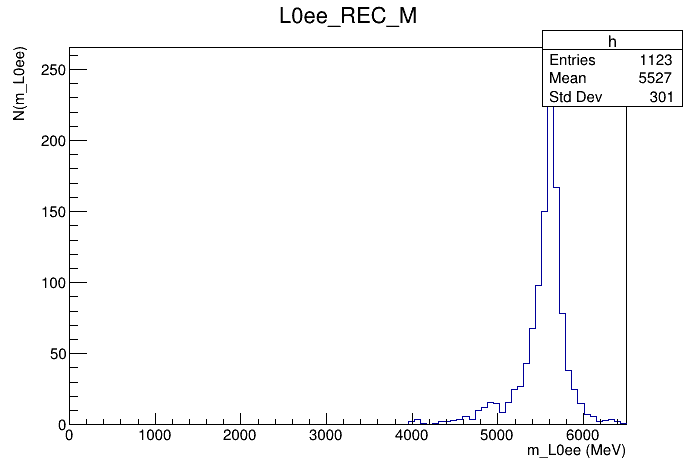

In [40]:
# L0ee_REC_M

h24 = R.TH1F('h', 'L0ee_REC_M', 92, 0, 6500)
for value in L0ee_REC_M:
    h24.Fill(value)
c24 = R.TCanvas()
h24.GetXaxis().SetTitle('m_L0ee (MeV)')
h24.GetYaxis().SetTitle('N(m_L0ee)')
h24.Draw()
c24.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


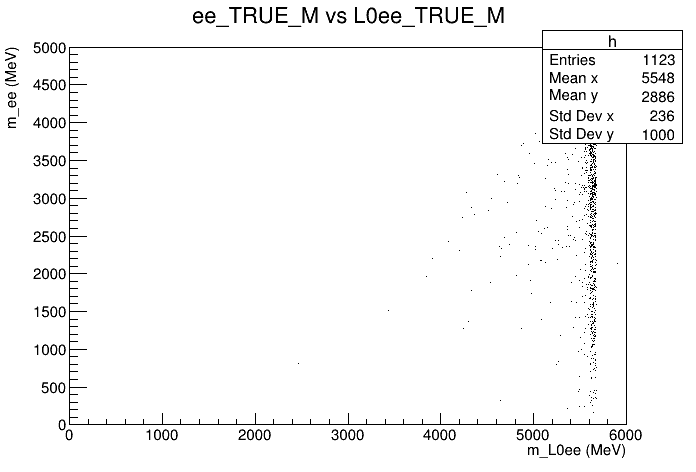

In [41]:
h25 = R.TH2F('h', 'ee_TRUE_M vs L0ee_TRUE_M', 92, 0, 6000, 92, 0, 5000)

newdf = pd.concat([L0ee_TRUE_M, ee_TRUE_M], axis=1)

for index, row in newdf.iterrows():
    x, y = row[0], row[1]
    h25.Fill(x,y)
c25 = R.TCanvas()
h25.GetXaxis().SetTitle('m_L0ee (MeV)')
h25.GetYaxis().SetTitle('m_ee (MeV)')
h25.Draw()
c25.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


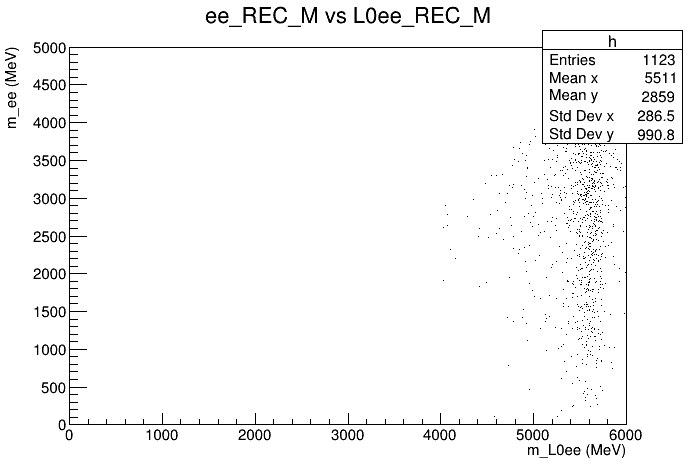

In [42]:
h26 = R.TH2F('h', 'ee_REC_M vs L0ee_REC_M', 92, 0, 6000, 92, 0, 5000)

newdf = pd.concat([L0ee_REC_M, ee_REC_M], axis=1)

for index, row in newdf.iterrows():
    x, y = row[0], row[1]
    h26.Fill(x,y)
c26 = R.TCanvas()
h26.GetXaxis().SetTitle('m_L0ee (MeV)')
h26.GetYaxis().SetTitle('m_ee (MeV)')
h26.Draw()
c26.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


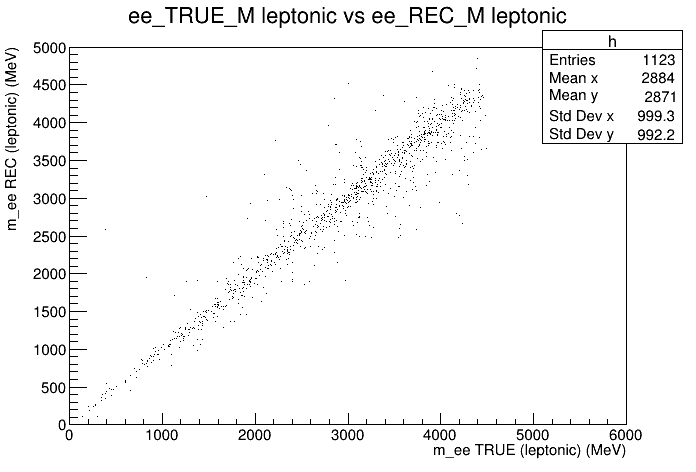

In [43]:
h27 = R.TH2F('h', 'ee_TRUE_M leptonic vs ee_REC_M leptonic', 92, 0, 6000, 92, 0, 5000)

newdf = pd.concat([ee_TRUE_M, ee_REC_M], axis=1)

for index, row in newdf.iterrows():
    x, y = row[0], row[1]
    h27.Fill(x,y)
c27 = R.TCanvas()
h27.GetXaxis().SetTitle('m_ee TRUE (leptonic) (MeV)')
h27.GetYaxis().SetTitle('m_ee REC (leptonic) (MeV)')
h27.Draw()
c27.Draw()